In [1]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

2022-05-25 12:44:14.721370: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-25 12:44:14.721399: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, Activation, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import math

# import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


from keras.utils import np_utils

In [3]:
img = cv2.imread("/home/naman/Documents/image_dataset/train/positive/S042_001_00000018.png")

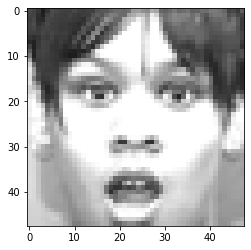

In [4]:
plt.imshow(img)

In [5]:
img = cv2.imread("/home/naman/Documents/image_dataset/train/negative/S005_001_00000009.png")

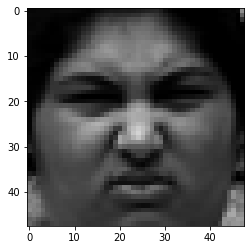

In [6]:
plt.imshow(img)

In [7]:
img.shape

(48, 48, 3)

In [8]:
data_path = '/home/naman/Documents/image_dataset/train/'
#TEST_PATH = 'data/fer2013_cls3/test/'

row, col = 48, 48
classes = 2

In [9]:

def count_image(data_path):
    total_images = 0
    for directory in os.listdir(data_path):
        count =0
        for f in os.listdir(data_path + '/'+ directory + '/'):
            count +=1
            total_images +=1
            
        print(f"{directory} has {count} number images")
        
    print(f"Total number images is {total_images}")
    
    return total_images

In [10]:
total_images=count_image(data_path)
total_images

negative has 431 number images
positive has 457 number images
Total number images is 888


888

In [11]:
EMOTIONS = ['negative','positive']

In [12]:
def image_to_array(total_image, data_path):
    image_array = np.empty(shape=(total_images, 48, 48, 3))
    image_label = np.empty(shape=(total_images))
    label_to_text= {}
    
    
    i = 0
    e = 0
    
    for directory in os.listdir(data_path):
#         print(directory)
        if directory in EMOTIONS:
            label_to_text[e] = directory
            
            for f in os.listdir(data_path + "/"+directory + "/"):
                
                
                img = cv2.imread(data_path +  "/"+ directory + "/" +f)
                image_array[i] = img
            
                plt.imshow(img)
                image_label[i]= e
                i +=1

            print(f"All images converted to array of {directory} directory")
            
            e +=1
            
    return image_array, image_label, label_to_text

All images converted to array of negative directory
All images converted to array of positive directory


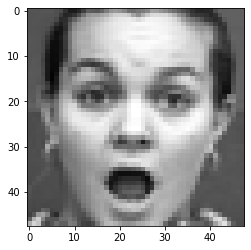

In [13]:
train_image_array, train_image_label, train_label_to_text = image_to_array(total_images, data_path)

In [14]:
train_image_array.shape

(888, 48, 48, 3)

In [15]:
def show_some_image(label_to_text, image_array, image_label):
    fig = plt.figure(1,(14, 14))
    
    idx = 0
    
    for k in label_to_text:
        indices = np.random.choice(np.where(image_label==k)[0], size=1, replace=False)
        
        sample_images = image_array[indices]
        
        for img in sample_images:
            idx += 1
            ax = plt.subplot(7,7,idx)
            ax.imshow(img[:,:,0], cmap='gray')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(label_to_text[k])
            plt.tight_layout()
#         plt.savefig('chart/ck/ck7.png')

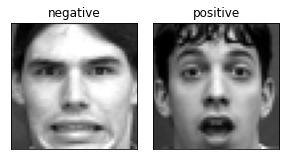

In [16]:
show_some_image(train_label_to_text, train_image_array, train_image_label)

In [17]:
train_image_label_cat = np_utils.to_categorical(train_image_label)

In [18]:
train_image_label_cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [19]:
train_image_array_resize = train_image_array/ 255.0

### Training time run below cell

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(train_image_array_resize, train_image_label_cat, stratify = train_image_label_cat, shuffle =True, test_size=0.2, random_state= 42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((710, 48, 48, 3), (178, 48, 48, 3), (710, 2), (178, 2))

### Testing time run below cell

In [21]:
# X_train, X_valid, y_train, y_valid = train_test_split(train_image_array_resize, train_image_label_cat, shuffle=False, test_size=0.2, random_state= 42)

# X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

In [22]:
X_train[0]

array([[[0.04705882, 0.04705882, 0.04705882],
        [0.03921569, 0.03921569, 0.03921569],
        [0.01568627, 0.01568627, 0.01568627],
        ...,
        [0.37254902, 0.37254902, 0.37254902],
        [0.36078431, 0.36078431, 0.36078431],
        [0.35686275, 0.35686275, 0.35686275]],

       [[0.03529412, 0.03529412, 0.03529412],
        [0.01960784, 0.01960784, 0.01960784],
        [0.01568627, 0.01568627, 0.01568627],
        ...,
        [0.34509804, 0.34509804, 0.34509804],
        [0.3372549 , 0.3372549 , 0.3372549 ],
        [0.3372549 , 0.3372549 , 0.3372549 ]],

       [[0.03529412, 0.03529412, 0.03529412],
        [0.00392157, 0.00392157, 0.00392157],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.30980392, 0.30980392, 0.30980392],
        [0.3372549 , 0.3372549 , 0.3372549 ],
        [0.3372549 , 0.3372549 , 0.3372549 ]],

       ...,

       [[0.29411765, 0.29411765, 0.29411765],
        [0.30196078, 0.30196078, 0.30196078],
        [0.30588235, 0

In [23]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [34]:
print(img_width)
print(img_height)
print(img_depth)
print(num_classes)

48
48
3
2


In [24]:
# X_train = X_train / 255.
# X_valid = X_valid / 255.

In [25]:
def build_net(optim):
   
    net = Sequential()

    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(img_width, img_height, img_depth),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal'
        )
    )
    net.add(BatchNormalization())
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal'
        )
    )
    net.add(BatchNormalization())
    
    net.add(MaxPooling2D(pool_size=(2,2)))
    net.add(Dropout(0.2))

    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal'
        )
    )
    net.add(BatchNormalization())
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal'
        )
    )
    net.add(BatchNormalization())
    
    net.add(MaxPooling2D(pool_size=(2,2), ))
    net.add(Dropout(0.2))

    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal'
        )
    )
    net.add(BatchNormalization())
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal'
        )
    )
    net.add(BatchNormalization())
    
    net.add(MaxPooling2D(pool_size=(2,2) ))
    net.add(Dropout(0.2))

    net.add(Flatten())
        
    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal'
        )
    )
    net.add(BatchNormalization())
    
    net.add(Dropout(0.2))
    
    net.add(
        Dense(
            num_classes,
            activation='sigmoid'
        )
    )
    
    net.compile(
        loss='binary_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )
    
    net.summary()
    
    return net

In [26]:

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=30,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [27]:
# As the data in hand is less as compared to the task so ImageDataGenerator is good to go.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(X_train)

In [28]:
batch_size = 40 #batch size of 32 performs the best.
epochs = 60
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    optimizers.Adam(0.001),
]

# I tried both `Nadam` and `Adam`, the difference in results is not different but I finally went with Adam as it is more popular.
model = build_net(optims[1]) 


2022-05-25 12:44:49.057812: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/naman/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-05-25 12:44:49.057863: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-25 12:44:49.057903: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (naman-HP-ProDesk-600-G3-MT): /proc/driver/nvidia/version does not exist
2022-05-25 12:44:49.083548: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                        

In [29]:
stringlist = []
model.summary(print_fn=lambda x: stringlist.append(x))
short_model_summary = "\n".join(stringlist)
print(short_model_summary)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                        

In [31]:
!pip install pydot

In [32]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [60]:
history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks,
    use_multiprocessing=True
)

Epoch 1/60


/tmp/ipykernel_11633/4221821476.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


17/17 [==============================] - 19s 1s/step - loss: 0.7881 - accuracy: 0.6746 - val_loss: 2.9011 - val_accuracy: 0.5506 - lr: 0.0010
Epoch 2/60
17/17 [==============================] - 19s 1s/step - loss: 0.4353 - accuracy: 0.8042 - val_loss: 2.0516 - val_accuracy: 0.5787 - lr: 0.0010
Epoch 3/60
17/17 [==============================] - 19s 1s/step - loss: 0.3698 - accuracy: 0.8634 - val_loss: 4.2554 - val_accuracy: 0.5281 - lr: 0.0010
Epoch 4/60
17/17 [==============================] - 18s 1s/step - loss: 0.3293 - accuracy: 0.8648 - val_loss: 0.7522 - val_accuracy: 0.8202 - lr: 0.0010
Epoch 5/60
17/17 [==============================] - 18s 1s/step - loss: 0.3053 - accuracy: 0.8761 - val_loss: 1.6580 - val_accuracy: 0.6404 - lr: 0.0010
Epoch 6/60
17/17 [==============================] - 19s 1s/step - loss: 0.2299 - accuracy: 0.9056 - val_loss: 0.3856 - val_accuracy: 0.8876 - lr: 0.0010
Epoch 7/60
17/17 [==============================] - 19s 1s/step - loss: 0.2168 - accuracy: 0.

17/17 [==============================] - 37s 2s/step - loss: 0.0158 - accuracy: 0.9958 - val_loss: 0.0998 - val_accuracy: 0.9831 - lr: 2.5000e-04
Epoch 52/60
17/17 [==============================] - 40s 2s/step - loss: 0.0155 - accuracy: 0.9915 - val_loss: 0.1019 - val_accuracy: 0.9831 - lr: 1.2500e-04
Epoch 53/60
17/17 [==============================] - 25s 1s/step - loss: 0.0092 - accuracy: 0.9986 - val_loss: 0.1044 - val_accuracy: 0.9831 - lr: 1.2500e-04
Epoch 54/60
17/17 [==============================] - 20s 1s/step - loss: 0.0306 - accuracy: 0.9930 - val_loss: 0.1158 - val_accuracy: 0.9775 - lr: 1.2500e-04
Epoch 55/60
17/17 [==============================] - 39s 2s/step - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.0928 - val_accuracy: 0.9888 - lr: 1.2500e-04
Epoch 56/60
17/17 [==============================] - 42s 2s/step - loss: 0.0167 - accuracy: 0.9958 - val_loss: 0.0812 - val_accuracy: 0.9888 - lr: 1.2500e-04
Epoch 57/60
17/17 [==============================] - 42s 2s/step

In [63]:
#plot_model(model, to_file='chart/ck/ck_arr_class_7.png', show_shapes=True, show_layer_names=True)
#plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True, dpi=50, to_file='model.png')

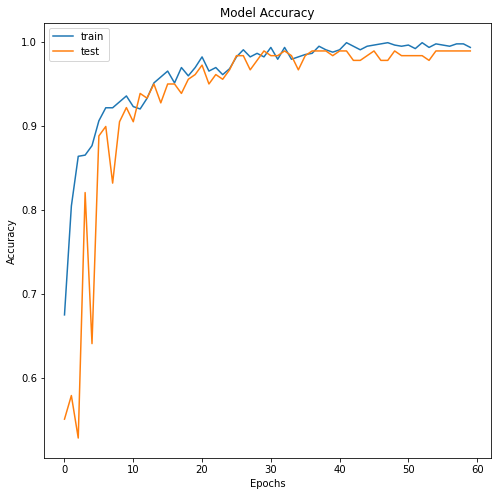

In [61]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig("chart/ck/acc_ck_arr_class_7.png")
# plt.savefig("chart/ck/acc_ck_arr_class_7.eps",format='eps',bbox_inches='tight')
plt.show()

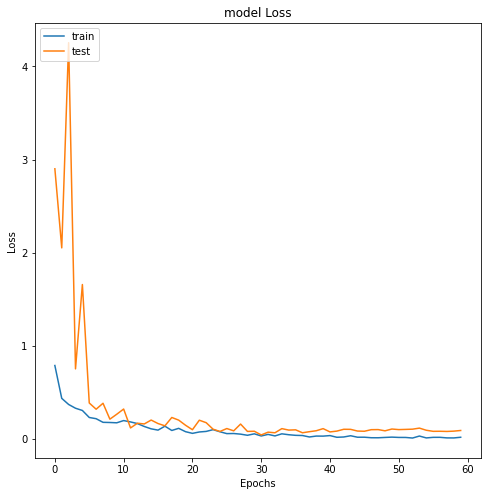

In [62]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
# pyplot.savefig("chart/ck/loss_ck_arr_class_7.png")
# pyplot.savefig("chart/ck/loss_ck_arr_class_7.eps",format='eps',bbox_inches='tight')
plt.show()


In [30]:
yhat_valid = model.pred(X_valid)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid, figsize=(7,7))
pyplot.savefig("confusion_ck_arr_class_7.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_valid, axis=1), yhat_valid))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [31]:
loss, accuracy = model.evaluate(X_valid, y_valid)
print(f"Accuracy: {accuracy}")
y_pred = model.predict(X_valid)
from sklearn.metrics import roc_auc_score
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(np.argmax(y_valid, axis=1), yhat_valid, pos_label=2)
auc=metrics.auc(fpr, tpr)
print(" AUC = {:.2f}".format(auc*100))
from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid)

print(cm_test)
cm_test.diagonal()/cm_test.sum(axis=1)

7/7 [==============================] - 1s 113ms/step - loss: 0.5499 - accuracy: 0.8832
Accuracy: 0.8832487463951111


NameError: name 'yhat_valid' is not defined

### storing the model in json

In [63]:
from keras.models import model_from_json

# serialize model to json
json_model = model.to_json()

#save the model architecture to JSON file
with open('cnnsentiment_model2.json', 'w') as json_file:
    json_file.write(json_model)

#saving the weights of the model
model.save_weights('cnnsentiment_weights2.h5')

#Model loss and accuracy
loss,acc = model.evaluate(X_valid, y_valid, verbose=2)

6/6 - 2s - loss: 0.0820 - accuracy: 0.9888 - 2s/epoch - 254ms/step


In [64]:
# loading the model
with open('cnnsentiment_model2.json', 'r') as json_file:
    json_savedModel= json_file.read()

#load the model architecture 
model_j = tf.keras.models.model_from_json(json_savedModel)

model_j.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                        

In [65]:
model_j.load_weights('cnnsentiment_weights2.h5')

In [66]:
#Compiling the model
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    optimizers.Adam(0.001),
]
model_j.compile(loss='binary_crossentropy',
         optimizer=optims[1],
         metrics=['accuracy'])

In [ ]:
loss,acc = model_j.evaluate(X_valid, y_valid, verbose=2)

In [30]:
#Iterate thru all the layers of the model
for layer in model_j.layers:
#     print(layer)
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name, filters.shape)
        
#         #normalize filter values between  0 and 1 for visualization
#         f_min, f_max = weights.min(), weights.max()
#         filters = (weights - f_min) / (f_max - f_min)  
#         print(filters.shape[3])
#         filter_cnt=1
        
#         #plotting all the filters
#         for i in range(filters.shape[3]):
#             #get the filters
#             filt=filters[:,:,:, i]
#             #plotting each of the channel, color image RGB channels
#             for j in range(filters.shape[0]):
#                 ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
#                 ax.set_xticks([])
#                 ax.set_yticks([])
#                 plt.imshow(filt[:,:, j])
#                 filter_cnt+=1
#         plt.show()

NameError: name 'filters' is not defined

### Visualizing Feature maps or Activation maps generated in a CNN

In [ ]:
img_path='\\dogs-vs-cats\\test1\\137.jpg' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(150, 150))

# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)

# Rescale by 1/255
x /= 255.0

# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)

# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
        # Postprocess the feature to be visually palatable
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            # Tile each filter into a horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
            
            # Display the grid
            scale = 20. / n_features
            plt.figure( figsize=(scale * n_features, scale) )
            plt.title ( layer_name )
            plt.grid  ( False )
            plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [46]:
int(model_j.predict(img_1)[0][1])

1

In [47]:
pos=-1
for ix, value in enumerate(model_j.predict(img_1)[0]):
    print(value)
    if int(value)==1:
        pos=ix
#     print("{:.2f}".format(i))

#     print(int(i))
#     print(pos)
    
        if pos == 0:
            print("sentiment detectd: negative")

        elif pos == 1:
            print("sentiment detectd: positive")

2.3119898e-29
1.0
sentiment detectd: positive


In [48]:
def get_label(img):
    
    pos=-1
    for ix, value in enumerate(model_j.predict(img)[0]):
#         print(value)
        if int(value)==1:
            pos=ix
    #     print("{:.2f}".format(i))

    #     print(int(i))
    #     print(pos)

            if pos == 0:
                print("sentiment detectd: negative")

            elif pos == 1:
                print("sentiment detectd: positive")
                
        return int(value)

In [135]:
#testing 50 images
import streamlit as st

In [136]:
st.write(1234)

2022-05-17 19:05:33.752 
  command:

    streamlit run /home/naman/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [139]:
! streamlit run /home/naman/anaconda3/lib/python3.9/site-packages/ck_arr_class_7_f.ipynb

2022-05-17 19:07:07.798 INFO    numexpr.utils: NumExpr defaulting to 8 threads.
Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Streamlit requires raw Python (.py) files, not .ipynb.
For more information, please see https://docs.streamlit.io


In [161]:
for ix,img in enumerate(X_test):
#     img=cv2.imread("/home/naman/Documents/jaffedbase/jaffedbase/"+img)
#     plt.imshow(img)
    try:
        print(img)
        img = cv2.imread('/home/naman/Documents/jaffedbase/jaffedbase/'+img)
        img = cv2.resize(img, (48,48))
        img = img.reshape(1,48,48,3)
        value = get_label(img)
        if value == y_test[ix]
    except:
        pass
# #     print(img)
# #     break

NA.DI3.216.tiff
sentiment detectd: contempt
TM.AN1.190.tiff
sentiment detectd: contempt
KL.FE1.174.tiff
sentiment detectd: contempt
NM.AN1.104.tiff
sentiment detectd: anger
MK.SA3.121.tiff
sentiment detectd: contempt
MK.AN1.125.tiff
sentiment detectd: contempt
KL.SA2.162.tiff
sentiment detectd: anger
KR.SA2.78.tiff
sentiment detectd: anger
TM.DI1.193.tiff
sentiment detectd: anger
NA.NE2.200.tiff
sentiment detectd: anger
KA.DI2.43.tiff
sentiment detectd: contempt
UY.SA3.142.tiff
sentiment detectd: contempt
KA.SA2.34.tiff
sentiment detectd: contempt
KM.DI3.22.tiff
sentiment detectd: sadness
KR.SU3.82.tiff
sentiment detectd: anger
YM.SA3.57.tiff
sentiment detectd: anger
NM.SA1.98.tiff
sentiment detectd: anger
NM.SU1.101.tiff
sentiment detectd: anger
UY.AN3.148.tiff
sentiment detectd: contempt
KM.SA5.13.tiff
sentiment detectd: contempt
KM.SA2.10.tiff
sentiment detectd: contempt
NA.NE1.199.tiff
sentiment detectd: anger
YM.NE2.50.tiff
sentiment detectd: contempt
UY.HA3.139.tiff
sentiment det

sentiment detectd: sadness
UY.SA2.141.tiff
sentiment detectd: contempt
KA.SU1.36.tiff
sentiment detectd: anger
NA.HA2.203.tiff
sentiment detectd: anger
TM.FE3.198.tiff
sentiment detectd: contempt
YM.FE2.68.tiff
sentiment detectd: contempt
YM.SU3.60.tiff
sentiment detectd: anger
KM.SU1.14.tiff
sentiment detectd: anger
TM.FE1.196.tiff
sentiment detectd: contempt
NM.SU3.103.tiff
sentiment detectd: anger
YM.SU1.58.tiff
sentiment detectd: anger
KR.SU1.80.tiff
sentiment detectd: anger
KL.HA2.159.tiff
sentiment detectd: contempt
NM.HA1.95.tiff
sentiment detectd: anger
YM.AN1.61.tiff
sentiment detectd: anger
KM.SU2.15.tiff
sentiment detectd: anger
KR.AN3.85.tiff
sentiment detectd: anger
UY.FE1.152.tiff
sentiment detectd: contempt
KL.NE1.155.tiff
sentiment detectd: contempt
NM.SA3.100.tiff
sentiment detectd: anger
